In [34]:
# Import the Pandas library
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [35]:
csv_path = Path("neighbourhood-crime-rates - 4326.csv")
toronto_df = pd.read_csv(csv_path, low_memory=False)
#toronto_df.head()

In [36]:
#add colunm for distracts
toronto_df["Districts"] =""
toronto_df.head()

,_id,AREA_NAME,HOOD_ID,POPN_PROJ_2022,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,...,THEFTOVER_RATE_2015,THEFTOVER_RATE_2016,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,geometry,Districts
0,1,South Eglinton-Davisville,174,21418,63,61,70,82,85,70,...,16.33453,21.59011,5.237247,15.23229,14.82287,24.19784,28.63415,14.00691,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",
1,2,North Toronto,173,14544,45,52,43,52,55,77,...,25.91121,17.30553,24.750430,39.41353,30.23432,43.83081,14.24197,27.50275,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",
2,3,Dovercourt Village,172,13789,56,57,79,94,94,96,...,22.21893,37.18025,22.146760,29.14602,21.69825,21.70924,14.54122,29.00863,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",
3,4,Junction-Wallace Emerson,171,25777,154,157,166,157,157,182,...,20.97579,24.75350,24.404130,27.95639,15.75485,35.25402,31.30993,31.03542,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",
4,5,Yonge-Bay Corridor,170,14213,394,525,487,603,576,660,...,274.19800,233.30170,289.951100,349.53920,481.90930,259.79810,188.65190,351.79060,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",


In [37]:
#Grouping the values of the Hood Id to the distract 
# Using https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto#East_End to help with the numbers 
#https://stackoverflow.com/questions/19226488/change-one-value-based-on-another-value-in-pandas as a source 
toronto_df.loc[(toronto_df.HOOD_ID >0) & (toronto_df.HOOD_ID <22),['Districts']] = "Etobicoke"
toronto_df.loc[(toronto_df.HOOD_ID >23) & (toronto_df.HOOD_ID <54),['Districts']] = "North York"
toronto_df.loc[(toronto_df.HOOD_ID >55) & (toronto_df.HOOD_ID <62),['Districts']] = "East York"
toronto_df.loc[(toronto_df.HOOD_ID >63) & (toronto_df.HOOD_ID <106),['Districts']] = "Old City of Toronto"
toronto_df.loc[(toronto_df.HOOD_ID >107) & (toronto_df.HOOD_ID <116),['Districts']] = "York"
toronto_df.loc[(toronto_df.HOOD_ID >117) & (toronto_df.HOOD_ID <141),['Districts']] = "Scarborough"
toronto_df.loc[(toronto_df.HOOD_ID >141) & (toronto_df.HOOD_ID <175),['Districts']] = "Old City of Toronto" #used it for ones neighbourhoods that were not inclued

#toronto_df.head() to test 


In [38]:
#total populations for allthe districts 
toronto_population = toronto_df[["AREA_NAME","POPN_PROJ_2022","Districts"]]
toronto_population=toronto_population.groupby(["Districts"])
POPN_PROJ_2022 = toronto_population["POPN_PROJ_2022"].sum()
final_toronto_pop = pd.DataFrame({"total poulation porjection":POPN_PROJ_2022})
final_toronto_pop.tail(6)

,total poulation porjection
Districts,
East York,81815
Etobicoke,318728
North York,559635
Old City of Toronto,1278318
Scarborough,415388
York,109828


In [39]:
#reduce to different rates per crime 
toronto_assualt=toronto_df[["AREA_NAME",
                            "Districts",
                            "ASSAULT_2014",
                           "ASSAULT_2015",
                           "ASSAULT_2016",
                           "ASSAULT_2017",
                           "ASSAULT_2018",
                           "ASSAULT_2019",
                           "ASSAULT_2020",
                           "ASSAULT_2021",
                           "ASSAULT_2022"]]
#toronto_assualt.head()

#Grouping by the disricts to make easier 
dis_assu=toronto_assualt.groupby(["Districts"])
#suming the whole thing up for each district
total_2014ass=dis_assu["ASSAULT_2014"].sum()
total_2015ass=dis_assu["ASSAULT_2015"].sum()
total_2016ass=dis_assu["ASSAULT_2016"].sum()
total_2017ass=dis_assu["ASSAULT_2017"].sum()
total_2018ass=dis_assu["ASSAULT_2018"].sum()
total_2019ass=dis_assu["ASSAULT_2019"].sum()
total_2020ass=dis_assu["ASSAULT_2020"].sum()
total_2021ass=dis_assu["ASSAULT_2021"].sum()
total_2022ass=dis_assu["ASSAULT_2022"].sum()
final_ass = pd.DataFrame ({
                           "total_2014":total_2014ass,
                           "total_2015":total_2015ass,
                            "total_2016":total_2016ass,
                           "total_2017":total_2017ass,
                           "total_2018":total_2018ass,
                           "total_2019": total_2019ass,
                           "total_2020": total_2020ass,
                           "total_2021" : total_2021ass,
                           "total_2022" : total_2022ass})

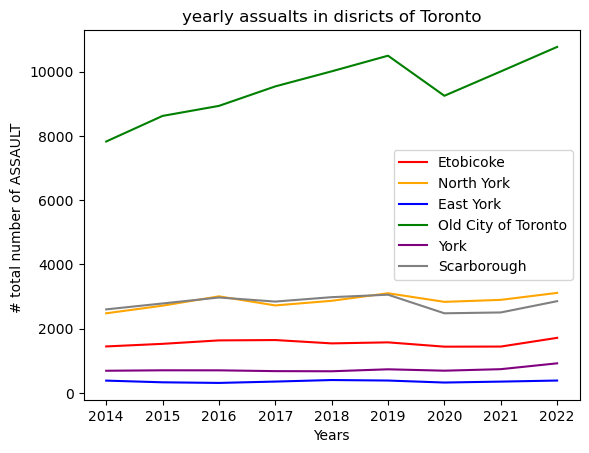

In [40]:
#To graph the data 
year_ass= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_etob = final_ass.loc["Etobicoke"]
dis_north = final_ass.loc["North York"]
dis_east= final_ass.loc["East York"]
dis_old = final_ass.loc["Old City of Toronto"]
dis_york = final_ass.loc["York"]
dis_scar = final_ass.loc["Scarborough"]

plt.plot( year_ass,dis_etob, color="red", label="Etobicoke")
plt.plot( year_ass,dis_north, color="orange", label="North York")
plt.plot( year_ass,dis_east, color="blue", label="East York")
plt.plot( year_ass,dis_old, color="green", label="Old City of Toronto")
plt.plot( year_ass,dis_york, color="purple", label="York")
plt.plot( year_ass,dis_scar, color="grey", label="Scarborough")
plt.legend(loc="best")
plt.title("yearly assualts in disricts of Toronto")
plt.xlabel("Years")
plt.ylabel("# total number of ASSAULT ")
plt.savefig("Fig1-stephen.png")
plt.show()


In [41]:
final_ass.describe()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2362.142857,2554.857143,2662.000000,2705.571429,2798.428571,2943.142857,2568.285714,2716.857143,3002.000000
std,2550.727506,2833.263044,2958.034201,3160.388998,3334.950517,3494.494595,3085.914868,3342.560617,3565.520906
min,381.000000,328.000000,309.000000,351.000000,399.000000,383.000000,321.000000,350.000000,383.000000
25%,903.500000,955.000000,891.500000,919.000000,897.000000,996.000000,829.500000,911.000000,1091.000000
50%,1445.000000,1526.000000,1633.000000,1644.000000,1540.000000,1572.000000,1438.000000,1441.000000,1712.000000
75%,2538.000000,2748.500000,2987.000000,2782.000000,2922.500000,3078.500000,2655.000000,2699.000000,2983.000000
max,7826.000000,8623.000000,8935.000000,9542.000000,10011.000000,10498.000000,9250.000000,10007.000000,10771.000000


In [42]:
final_pop_ass = pd.merge(final_ass,final_toronto_pop, how = 'outer',
                      on='Districts') 
final_pop_ass.corr()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total poulation porjection
total_2014,1.000000,0.999956,0.999306,0.999478,0.999441,0.999360,0.998099,0.997044,0.997783,0.989627
total_2015,0.999956,1.000000,0.999299,0.999402,0.999328,0.999412,0.998268,0.997266,0.997952,0.990255
total_2016,0.999306,0.999299,1.000000,0.998087,0.998195,0.998216,0.997605,0.995701,0.996333,0.993094
total_2017,0.999478,0.999402,0.998087,1.000000,0.999755,0.999567,0.998749,0.998328,0.998982,0.987805
total_2018,0.999441,0.999328,0.998195,0.999755,1.000000,0.999837,0.998951,0.998518,0.998911,0.987335
total_2019,0.999360,0.999412,0.998216,0.999567,0.999837,1.000000,0.999327,0.998995,0.999230,0.988498
total_2020,0.998099,0.998268,0.997605,0.998749,0.998951,0.999327,1.000000,0.999642,0.999589,0.990503
total_2021,0.997044,0.997266,0.995701,0.998328,0.998518,0.998995,0.999642,1.000000,0.999819,0.987467
total_2022,0.997783,0.997952,0.996333,0.998982,0.998911,0.999230,0.999589,0.999819,1.000000,0.987178
total poulation porjection,0.989627,0.990255,0.993094,0.987805,0.987335,0.988498,0.990503,0.987467,0.987178,1.000000


In [43]:
#auto thefts in the area
toronto_auto = toronto_df[["AREA_NAME",
                            "Districts",
                            "AUTOTHEFT_2014",
                           "AUTOTHEFT_2015",
                           "AUTOTHEFT_2016",
                           "AUTOTHEFT_2017",
                           "AUTOTHEFT_2018",
                           "AUTOTHEFT_2019",
                           "AUTOTHEFT_2020",
                           "AUTOTHEFT_2021",
                           "AUTOTHEFT_2022"]]
#Grouping by the disricts to make easier 
dis_auto=toronto_auto.groupby(["Districts"])
#suming the whole thing up for each di
total_2014auto=dis_auto["AUTOTHEFT_2014"].sum()
total_2015auto=dis_auto["AUTOTHEFT_2015"].sum()
total_2016auto=dis_auto["AUTOTHEFT_2016"].sum()
total_2017auto=dis_auto["AUTOTHEFT_2017"].sum()
total_2018auto=dis_auto["AUTOTHEFT_2018"].sum()
total_2019auto=dis_auto["AUTOTHEFT_2019"].sum()
total_2020auto=dis_auto["AUTOTHEFT_2020"].sum()
total_2021auto=dis_auto["AUTOTHEFT_2021"].sum()
total_2022auto=dis_auto["AUTOTHEFT_2022"].sum()
final_auto = pd.DataFrame ({
                           "total_2014":total_2014auto,
                           "total_2015":total_2015auto,
                            "total_2016":total_2016auto,
                           "total_2017":total_2017auto,
                           "total_2018":total_2018auto,
                           "total_2019": total_2019auto,
                           "total_2020": total_2020auto,
                           "total_2021" : total_2021auto,
                           "total_2022" : total_2022auto})

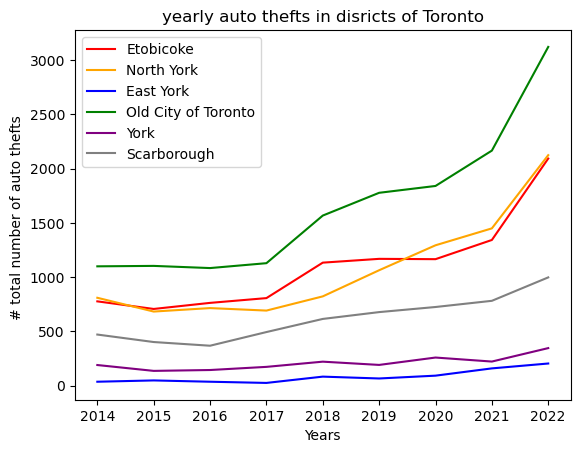

In [44]:
#To graph the data 
year_auto= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_etob1 = final_auto.loc["Etobicoke"]
dis_north1 = final_auto.loc["North York"]
dis_east1= final_auto.loc["East York"]
dis_old1 = final_auto.loc["Old City of Toronto"]
dis_york1 = final_auto.loc["York"]
dis_scar1 = final_auto.loc["Scarborough"]

plt.plot( year_auto,dis_etob1, color="red", label="Etobicoke")
plt.plot( year_auto,dis_north1, color="orange", label="North York")
plt.plot( year_auto,dis_east1, color="blue", label="East York")
plt.plot( year_auto,dis_old1, color="green", label="Old City of Toronto")
plt.plot( year_auto,dis_york1, color="purple", label="York")
plt.plot( year_auto,dis_scar1, color="grey", label="Scarborough")
plt.legend(loc="best")
plt.title("yearly auto thefts in disricts of Toronto")
plt.xlabel("Years")
plt.ylabel("# total number of auto thefts ")
plt.savefig("Fig2-stephen.png")
plt.show()

In [45]:
final_auto.describe()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,512.142857,465.857143,472.714286,510.428571,682.142857,754.428571,817.285714,934.000000,1355.000000
std,394.426769,383.222924,387.576966,391.491106,533.571747,617.596108,641.234152,747.647421,1103.990942
min,36.000000,48.000000,36.000000,25.000000,83.000000,66.000000,92.000000,159.000000,204.000000
25%,195.500000,158.500000,171.500000,213.000000,276.000000,263.000000,301.500000,318.500000,470.500000
50%,471.000000,402.000000,368.000000,494.000000,615.000000,678.000000,725.000000,782.000000,998.000000
75%,793.500000,695.000000,739.000000,749.500000,978.500000,1116.500000,1230.000000,1396.500000,2109.500000
max,1100.000000,1104.000000,1084.000000,1129.000000,1568.000000,1778.000000,1841.000000,2167.000000,3123.000000


In [46]:
final_pop_auto = pd.merge(final_auto,final_toronto_pop, how = 'outer',
                      on='Districts') 
final_pop_auto.corr()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total poulation porjection
total_2014,1.000000,0.992548,0.993981,0.989619,0.972686,0.989797,0.996622,0.990736,0.990810,0.866626
total_2015,0.992548,1.000000,0.996743,0.993370,0.987587,0.998724,0.996202,0.996890,0.995376,0.904098
total_2016,0.993981,0.996743,1.000000,0.992204,0.985806,0.995480,0.993838,0.993851,0.997773,0.872407
total_2017,0.989619,0.993370,0.992204,1.000000,0.993744,0.996649,0.987254,0.985231,0.984613,0.876541
total_2018,0.972686,0.987587,0.985806,0.993744,1.000000,0.992504,0.972284,0.975489,0.977357,0.873931
total_2019,0.989797,0.998724,0.995480,0.996649,0.992504,1.000000,0.992960,0.994546,0.992770,0.900182
total_2020,0.996622,0.996202,0.993838,0.987254,0.972284,0.992960,1.000000,0.997777,0.994810,0.900049
total_2021,0.990736,0.996890,0.993851,0.985231,0.975489,0.994546,0.997777,1.000000,0.997229,0.908864
total_2022,0.990810,0.995376,0.997773,0.984613,0.977357,0.992770,0.994810,0.997229,1.000000,0.883476
total poulation porjection,0.866626,0.904098,0.872407,0.876541,0.873931,0.900182,0.900049,0.908864,0.883476,1.000000


In [47]:
#breaking and entering in those areas 
toronto_break = toronto_df[["AREA_NAME",
                            "Districts",
                            "BREAKENTER_2014",
                           "BREAKENTER_2015",
                           "BREAKENTER_2016",
                           "BREAKENTER_2017",
                           "BREAKENTER_2018",
                           "BREAKENTER_2019",
                           "BREAKENTER_2020",
                           "BREAKENTER_2021",
                           "BREAKENTER_2022"]]
#Grouping by the disricts to make easier 
dis_break=toronto_break.groupby(["Districts"])
#suming the whole thing up for each di
total_2014break=dis_break["BREAKENTER_2014"].sum()
total_2015break=dis_break["BREAKENTER_2015"].sum()
total_2016break=dis_break["BREAKENTER_2016"].sum()
total_2017break=dis_break["BREAKENTER_2017"].sum()
total_2018break=dis_break["BREAKENTER_2018"].sum()
total_2019break=dis_break["BREAKENTER_2019"].sum()
total_2020break=dis_break["BREAKENTER_2020"].sum()
total_2021break=dis_break["BREAKENTER_2021"].sum()
total_2022break=dis_break["BREAKENTER_2022"].sum()
final_break = pd.DataFrame({
                           "total_2014":total_2014break,
                           "total_2015":total_2015break,
                            "total_2016":total_2016break,
                           "total_2017":total_2017break,
                           "total_2018":total_2018break,
                           "total_2019": total_2019break,
                           "total_2020":total_2020break,
                           "total_2021":total_2021break,
                           "total_2022":total_2022break})

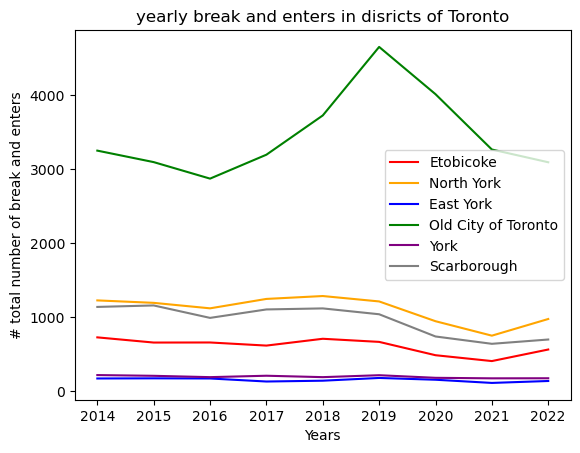

In [48]:
#To graph the data 
year_break= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_etob2 = final_break.loc["Etobicoke"]
dis_north2 = final_break.loc["North York"]
dis_east2= final_break.loc["East York"]
dis_old2= final_break.loc["Old City of Toronto"]
dis_york2 = final_break.loc["York"]
dis_scar2 = final_break.loc["Scarborough"]

plt.plot( year_break,dis_etob2, color="red", label="Etobicoke")
plt.plot( year_break,dis_north2, color="orange", label="North York")
plt.plot( year_break,dis_east2, color="blue", label="East York")
plt.plot( year_break,dis_old2, color="green", label="Old City of Toronto")
plt.plot( year_break,dis_york2, color="purple", label="York")
plt.plot( year_break,dis_scar2, color="grey", label="Scarborough")
plt.legend(loc="best")
plt.title("yearly break and enters in disricts of Toronto")
plt.xlabel("Years")
plt.ylabel("# total number of break and enters")
plt.savefig("Fig3-stephen.png")
plt.show()

In [49]:
final_break.describe()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1026.428571,987.571429,914.428571,983.285714,1080.714286,1205.428571,987.571429,810.142857,865.714286
std,1064.137813,1016.670851,938.382626,1064.175066,1245.832348,1567.478108,1363.272149,1106.486696,1024.304758
min,173.000000,175.000000,173.000000,132.000000,143.000000,180.000000,156.000000,113.000000,139.000000
25%,334.500000,316.500000,293.500000,294.000000,292.000000,344.500000,286.500000,247.000000,295.000000
50%,728.000000,658.000000,659.000000,617.000000,709.000000,667.000000,487.000000,408.000000,564.000000
75%,1183.000000,1176.500000,1055.500000,1176.000000,1202.500000,1126.500000,843.000000,696.000000,837.500000
max,3249.000000,3094.000000,2871.000000,3194.000000,3724.000000,4649.000000,4011.000000,3264.000000,3092.000000


In [50]:
final_pop_break = pd.merge(final_break,final_toronto_pop, how = 'outer',
                      on='Districts') 
final_pop_break.corr()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total poulation porjection
total_2014,1.000000,0.999453,0.999833,0.999204,0.998988,0.988516,0.980781,0.981479,0.990663,0.996852
total_2015,0.999453,1.000000,0.999099,0.999407,0.997628,0.985230,0.976637,0.977537,0.986704,0.995136
total_2016,0.999833,0.999099,1.000000,0.999211,0.998984,0.988014,0.980313,0.980721,0.990926,0.997873
total_2017,0.999204,0.999407,0.999211,1.000000,0.998281,0.986472,0.978582,0.979167,0.988709,0.996917
total_2018,0.998988,0.997628,0.998984,0.998281,1.000000,0.993700,0.987848,0.988237,0.995063,0.996418
total_2019,0.988516,0.985230,0.988014,0.986472,0.993700,1.000000,0.998960,0.999098,0.998133,0.984449
total_2020,0.980781,0.976637,0.980313,0.978582,0.987848,0.998960,1.000000,0.999825,0.996384,0.977209
total_2021,0.981479,0.977537,0.980721,0.979167,0.988237,0.999098,0.999825,1.000000,0.995921,0.976845
total_2022,0.990663,0.986704,0.990926,0.988709,0.995063,0.998133,0.996384,0.995921,1.000000,0.990840
total poulation porjection,0.996852,0.995136,0.997873,0.996917,0.996418,0.984449,0.977209,0.976845,0.990840,1.000000


In [51]:
#homicides in the area
toronto_homi =toronto_df [["AREA_NAME",
                            "Districts",
                            "HOMICIDE_2014",
                           "HOMICIDE_2015",
                           "HOMICIDE_2016",
                           "HOMICIDE_2017",
                           "HOMICIDE_2018",
                           "HOMICIDE_2019",
                           "HOMICIDE_2020",
                           "HOMICIDE_2021",
                           "HOMICIDE_2022"]]
#Grouping by the disricts to make easier 
dis_homi=toronto_homi.groupby(["Districts"])
#suming the whole thing up for each di
total_2014homi=dis_homi["HOMICIDE_2014"].sum()
total_2015homi=dis_homi["HOMICIDE_2015"].sum()
total_2016homi=dis_homi["HOMICIDE_2016"].sum()
total_2017homi=dis_homi["HOMICIDE_2017"].sum()
total_2018homi=dis_homi["HOMICIDE_2018"].sum()
total_2019homi=dis_homi["HOMICIDE_2019"].sum()
total_2020homi=dis_homi["HOMICIDE_2020"].sum()
total_2021homi=dis_homi["HOMICIDE_2021"].sum()
total_2022homi=dis_homi["HOMICIDE_2022"].sum()
final_homi = pd.DataFrame ({
                           "total_2014":total_2014homi,
                           "total_2015":total_2015homi,
                            "total_2016":total_2016homi,
                           "total_2017":total_2017homi,
                           "total_2018":total_2018homi,
                           "total_2019": total_2019homi,
                           "total_2020": total_2020homi,
                           "total_2021" : total_2021homi,
                           "total_2022" : total_2022homi})

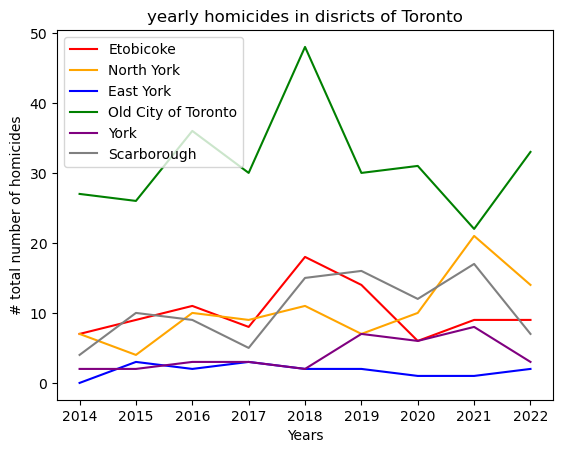

In [52]:
#To graph the data 
year_homi= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_etob3 = final_homi.loc["Etobicoke"]
dis_north3 = final_homi.loc["North York"]
dis_east3= final_homi.loc["East York"]
dis_old3= final_homi.loc["Old City of Toronto"]
dis_york3 = final_homi.loc["York"]
dis_scar3 = final_homi.loc["Scarborough"]

plt.plot( year_homi,dis_etob3, color="red", label="Etobicoke")
plt.plot( year_homi,dis_north3, color="orange", label="North York")
plt.plot( year_homi,dis_east3, color="blue", label="East York")
plt.plot( year_homi,dis_old3, color="green", label="Old City of Toronto")
plt.plot( year_homi,dis_york3, color="purple", label="York")
plt.plot( year_homi,dis_scar3, color="grey", label="Scarborough")
plt.legend(loc="best")
plt.title("yearly homicides in disricts of Toronto")
plt.xlabel("Years")
plt.ylabel("# total number of homicides")
plt.savefig("Fig4-stephen.png")
plt.show()

In [53]:
final_homi.describe()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,8.285714,8.428571,10.714286,9.285714,14.000000,11.285714,10.142857,12.142857,10.000000
std,9.013218,8.303757,11.714866,9.428932,16.401219,9.759001,9.856108,7.925246,11.045361
min,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000
25%,3.000000,3.500000,3.500000,4.000000,2.000000,5.000000,5.500000,7.500000,2.500000
50%,7.000000,5.000000,9.000000,7.000000,11.000000,7.000000,6.000000,9.000000,7.000000
75%,9.000000,9.500000,10.500000,8.500000,16.500000,15.000000,11.000000,19.000000,11.500000
max,27.000000,26.000000,36.000000,30.000000,48.000000,30.000000,31.000000,22.000000,33.000000


In [54]:
final_pop_homi = pd.merge(final_homi,final_toronto_pop, how = 'outer',
                      on='Districts') 
final_pop_homi.corr()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total poulation porjection
total_2014,1.000000,0.897745,0.921140,0.967678,0.871510,0.783365,0.892503,0.608304,0.883940,0.905642
total_2015,0.897745,1.000000,0.967777,0.936926,0.976564,0.952541,0.939956,0.619394,0.903131,0.921899
total_2016,0.921140,0.967777,1.000000,0.980112,0.988005,0.930927,0.966090,0.713184,0.980203,0.977178
total_2017,0.967678,0.936926,0.980112,1.000000,0.941936,0.850257,0.941030,0.652856,0.963392,0.961586
total_2018,0.871510,0.976564,0.988005,0.941936,1.000000,0.965266,0.944415,0.700088,0.955891,0.952374
total_2019,0.783365,0.952541,0.930927,0.850257,0.965266,1.000000,0.924798,0.699732,0.876691,0.885294
total_2020,0.892503,0.939956,0.966090,0.941030,0.944415,0.924798,1.000000,0.793426,0.950725,0.973588
total_2021,0.608304,0.619394,0.713184,0.652856,0.700088,0.699732,0.793426,1.000000,0.780620,0.822278
total_2022,0.883940,0.903131,0.980203,0.963392,0.955891,0.876691,0.950725,0.780620,1.000000,0.986736
total poulation porjection,0.905642,0.921899,0.977178,0.961586,0.952374,0.885294,0.973588,0.822278,0.986736,1.000000


In [55]:
#robbery in the areas 
toronto_robbery = toronto_df [["AREA_NAME",
                            "Districts",
                            "ROBBERY_2014",
                            "ROBBERY_2015",
                            "ROBBERY_2016",
                            "ROBBERY_2017",
                            "ROBBERY_2018",
                            "ROBBERY_2019",
                            "ROBBERY_2020",
                            "ROBBERY_2021",
                            "ROBBERY_2022"]]
#Grouping by the disricts to make easier 
dis_rob=toronto_robbery.groupby(["Districts"])
#suming the whole thing up for each di
total_2014rob=dis_rob["ROBBERY_2014"].sum()
total_2015rob=dis_rob["ROBBERY_2015"].sum()
total_2016rob=dis_rob["ROBBERY_2016"].sum()
total_2017rob=dis_rob["ROBBERY_2017"].sum()
total_2018rob=dis_rob["ROBBERY_2018"].sum()
total_2019rob=dis_rob["ROBBERY_2019"].sum()
total_2020rob=dis_rob["ROBBERY_2020"].sum()
total_2021rob=dis_rob["ROBBERY_2021"].sum()
total_2022rob=dis_rob["ROBBERY_2022"].sum()
final_rob = pd.DataFrame ({
                           "total_2014":total_2014rob,
                           "total_2015":total_2015rob,
                            "total_2016":total_2016rob,
                           "total_2017":total_2017rob,
                           "total_2018":total_2018rob,
                           "total_2019": total_2019rob,
                           "total_2020": total_2020rob,
                           "total_2021" : total_2021rob,
                           "total_2022" : total_2022rob})

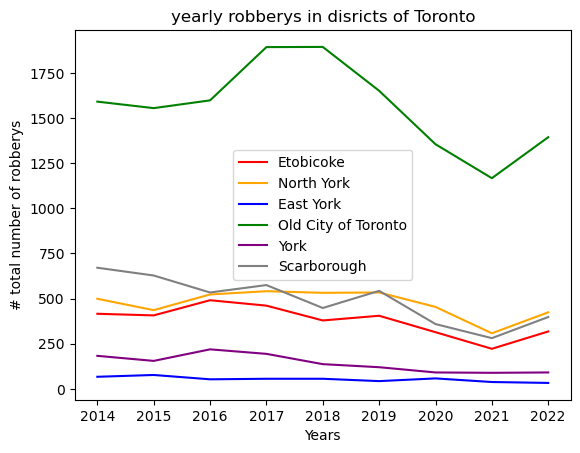

In [56]:
#To graph the data 
year_rob= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_etob4 = final_rob.loc["Etobicoke"]
dis_north4 = final_rob.loc["North York"]
dis_east4= final_rob.loc["East York"]
dis_old4= final_rob.loc["Old City of Toronto"]
dis_york4 = final_rob.loc["York"]
dis_scar4 = final_rob.loc["Scarborough"]

plt.plot( year_rob,dis_etob4, color="red", label="Etobicoke")
plt.plot( year_rob,dis_north4, color="orange", label="North York")
plt.plot( year_rob,dis_east4, color="blue", label="East York")
plt.plot( year_rob,dis_old4, color="green", label="Old City of Toronto")
plt.plot( year_rob,dis_york4, color="purple", label="York")
plt.plot( year_rob,dis_scar4, color="grey", label="Scarborough")
plt.legend(loc="best")
plt.title("yearly robberys in disricts of Toronto")
plt.xlabel("Years")
plt.ylabel("# total number of robberys")
plt.savefig("Fig5-stephen.png")
plt.show()

In [57]:
final_rob.describe()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,524.000000,496.000000,522.285714,572.571429,517.571429,501.428571,396.285714,320.428571,403.142857
std,512.771229,503.618904,508.479339,612.117325,631.489999,543.424591,447.663458,386.153189,462.085284
min,67.000000,77.000000,53.000000,56.000000,56.000000,43.000000,58.000000,38.000000,33.000000
25%,212.000000,184.500000,228.500000,241.000000,157.000000,167.000000,117.000000,113.500000,127.500000
50%,416.000000,407.000000,491.000000,461.000000,379.000000,405.000000,314.000000,222.000000,318.000000
75%,585.000000,532.000000,528.500000,558.000000,490.000000,538.500000,406.500000,294.500000,411.000000
max,1591.000000,1555.000000,1598.000000,1893.000000,1894.000000,1651.000000,1355.000000,1167.000000,1394.000000


In [58]:
final_pop_rob = pd.merge(final_rob,final_toronto_pop, how = 'outer',
                      on='Districts') 
final_pop_rob.corr()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total poulation porjection
total_2014,1.000000,0.999091,0.991566,0.991789,0.983150,0.994796,0.984024,0.983167,0.990695,0.978908
total_2015,0.999091,1.000000,0.991676,0.992767,0.984778,0.994301,0.984311,0.985153,0.991151,0.975308
total_2016,0.991566,0.991676,1.000000,0.997077,0.992955,0.996830,0.993456,0.991310,0.996516,0.984513
total_2017,0.991789,0.992767,0.997077,1.000000,0.996749,0.997457,0.994797,0.997398,0.998532,0.984832
total_2018,0.983150,0.984778,0.992955,0.996749,1.000000,0.994603,0.998142,0.999250,0.998043,0.987512
total_2019,0.994796,0.994301,0.996830,0.997457,0.994603,1.000000,0.996625,0.993450,0.999049,0.992205
total_2020,0.984024,0.984311,0.993456,0.994797,0.998142,0.996625,1.000000,0.995827,0.998611,0.994372
total_2021,0.983167,0.985153,0.991310,0.997398,0.999250,0.993450,0.995827,1.000000,0.997147,0.984163
total_2022,0.990695,0.991151,0.996516,0.998532,0.998043,0.999049,0.998611,0.997147,1.000000,0.991736
total poulation porjection,0.978908,0.975308,0.984513,0.984832,0.987512,0.992205,0.994372,0.984163,0.991736,1.000000


In [59]:
#shooting in the area
toronto_shoot = toronto_df [["AREA_NAME",
                            "Districts",
                             "SHOOTING_2014",
                             "SHOOTING_2015",
                             "SHOOTING_2016",
                             "SHOOTING_2017",
                             "SHOOTING_2018",
                             "SHOOTING_2019",
                             "SHOOTING_2020",
                             "SHOOTING_2021",
                             "SHOOTING_2022",]]
#Grouping by the disricts to make easier 
dis_shoot=toronto_shoot.groupby(["Districts"])
#suming the whole thing up for each di
total_2014shoot=dis_shoot["SHOOTING_2014"].sum()
total_2015shoot=dis_shoot["SHOOTING_2015"].sum()
total_2016shoot=dis_shoot["SHOOTING_2016"].sum()
total_2017shoot=dis_shoot["SHOOTING_2017"].sum()
total_2018shoot=dis_shoot["SHOOTING_2018"].sum()
total_2019shoot=dis_shoot["SHOOTING_2019"].sum()
total_2020shoot=dis_shoot["SHOOTING_2020"].sum()
total_2021shoot=dis_shoot["SHOOTING_2021"].sum()
total_2022shoot=dis_shoot["SHOOTING_2022"].sum()
final_shoot = pd.DataFrame ({
                           "total_2014":total_2014shoot,
                           "total_2015":total_2015shoot,
                            "total_2016":total_2016shoot,
                           "total_2017":total_2017shoot,
                           "total_2018":total_2018shoot,
                           "total_2019": total_2019shoot,
                           "total_2020": total_2020shoot,
                           "total_2021" : total_2021shoot,
                           "total_2022" : total_2022shoot})


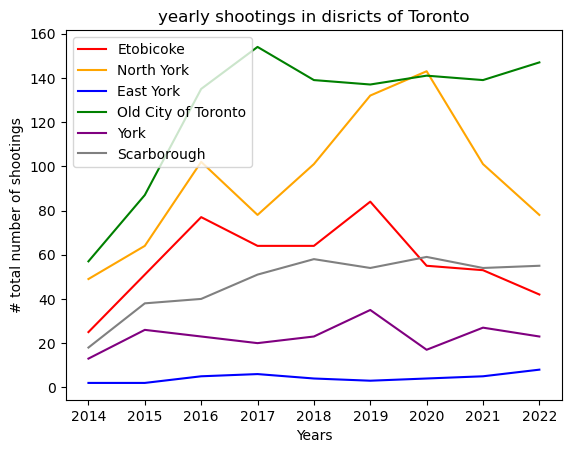

In [60]:
year_shoot= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_etob5 = final_shoot.loc["Etobicoke"]
dis_north5 = final_shoot.loc["North York"]
dis_east5= final_shoot.loc["East York"]
dis_old5= final_shoot.loc["Old City of Toronto"]
dis_york5 = final_shoot.loc["York"]
dis_scar5 = final_shoot.loc["Scarborough"]

plt.plot( year_rob,dis_etob5, color="red", label="Etobicoke")
plt.plot( year_rob,dis_north5, color="orange", label="North York")
plt.plot( year_rob,dis_east5, color="blue", label="East York")
plt.plot( year_rob,dis_old5, color="green", label="Old City of Toronto")
plt.plot( year_rob,dis_york5, color="purple", label="York")
plt.plot( year_rob,dis_scar5, color="grey", label="Scarborough")
plt.legend(loc="best")
plt.title("yearly shootings in disricts of Toronto")
plt.xlabel("Years")
plt.ylabel("# total number of shootings")
plt.savefig("Fig6-stephen.png")
plt.show()

In [61]:
final_shoot.describe()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,25.285714,41.142857,58.142857,56.000000,61.000000,70.285714,66.000000,58.428571,54.142857
std,20.270786,28.696275,47.736878,50.566788,46.411206,50.045693,55.524769,46.554116,46.958949
min,2.000000,2.000000,5.000000,6.000000,4.000000,3.000000,4.000000,5.000000,8.000000
25%,13.000000,23.000000,24.000000,19.500000,30.500000,41.000000,30.000000,28.500000,24.500000
50%,18.000000,38.000000,40.000000,51.000000,58.000000,54.000000,55.000000,53.000000,42.000000
75%,37.000000,57.500000,89.500000,71.000000,82.500000,108.000000,100.000000,77.500000,66.500000
max,57.000000,87.000000,135.000000,154.000000,139.000000,137.000000,143.000000,139.000000,147.000000


In [62]:
final_pop_shoot = pd.merge(final_shoot,final_toronto_pop, how = 'outer',
                      on='Districts') 
final_pop_shoot.corr()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total poulation porjection
total_2014,1.000000,0.966631,0.978424,0.930868,0.977900,0.982525,0.975392,0.985167,0.929850,0.894231
total_2015,0.966631,1.000000,0.983409,0.962043,0.978980,0.965180,0.917143,0.972677,0.934273,0.900453
total_2016,0.978424,0.983409,1.000000,0.958822,0.976969,0.974994,0.933129,0.969213,0.923258,0.898130
total_2017,0.930868,0.962043,0.958822,1.000000,0.968100,0.894566,0.872954,0.967535,0.982146,0.976889
total_2018,0.977900,0.978980,0.976969,0.968100,1.000000,0.966842,0.959977,0.993382,0.965011,0.941382
total_2019,0.982525,0.965180,0.974994,0.894566,0.966842,1.000000,0.968952,0.956159,0.875548,0.832814
total_2020,0.975392,0.917143,0.933129,0.872954,0.959977,0.968952,1.000000,0.961866,0.892529,0.853284
total_2021,0.985167,0.972677,0.969213,0.967535,0.993382,0.956159,0.961866,1.000000,0.976120,0.950024
total_2022,0.929850,0.934273,0.923258,0.982146,0.965011,0.875548,0.892529,0.976120,1.000000,0.993219
total poulation porjection,0.894231,0.900453,0.898130,0.976889,0.941382,0.832814,0.853284,0.950024,0.993219,1.000000


In [63]:
#theft over $5000
toronto_theftover= toronto_df [["AREA_NAME",
                            "Districts",
                            "THEFTOVER_2014",
                            "THEFTOVER_2015",
                            "THEFTOVER_2016",
                            "THEFTOVER_2017",
                            "THEFTOVER_2018",
                            "THEFTOVER_2019",
                            "THEFTOVER_2020",
                             "THEFTOVER_2021",
                            "THEFTOVER_2022"]]
#Grouping by the disricts to make easier 
dis_theft=toronto_theftover.groupby(["Districts"])
#suming the whole thing up for each di
total_2014theft=dis_theft["THEFTOVER_2014"].sum()
total_2015theft=dis_theft["THEFTOVER_2015"].sum()
total_2016theft=dis_theft["THEFTOVER_2016"].sum()
total_2017theft=dis_theft["THEFTOVER_2017"].sum()
total_2018theft=dis_theft["THEFTOVER_2018"].sum()
total_2019theft=dis_theft["THEFTOVER_2019"].sum()
total_2020theft=dis_theft["THEFTOVER_2020"].sum()
total_2021theft=dis_theft["THEFTOVER_2021"].sum()
total_2022theft=dis_theft["THEFTOVER_2022"].sum()
final_theft= pd.DataFrame ({
                           "total_2014":total_2014theft,
                           "total_2015":total_2015theft,
                            "total_2016":total_2016theft,
                           "total_2017":total_2017theft,
                           "total_2018":total_2018theft,
                           "total_2019": total_2019theft,
                           "total_2020": total_2020theft,
                           "total_2021" : total_2021theft,
                           "total_2022" : total_2022theft})


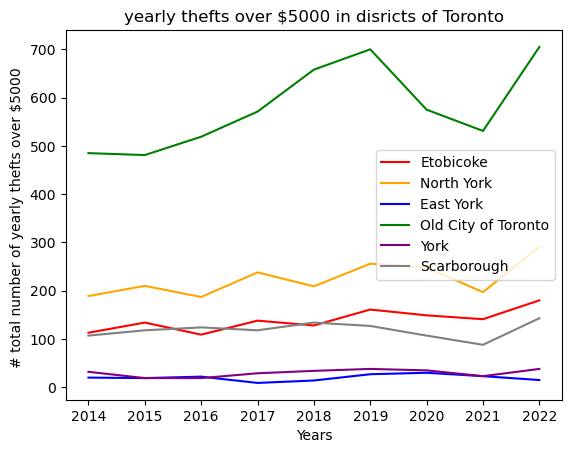

In [64]:
year_theft= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_etob6 = final_theft.loc["Etobicoke"]
dis_north6 = final_theft.loc["North York"]
dis_east6= final_theft.loc["East York"]
dis_old6= final_theft.loc["Old City of Toronto"]
dis_york6 = final_theft.loc["York"]
dis_scar6 = final_theft.loc["Scarborough"]

plt.plot( year_theft,dis_etob6, color="red", label="Etobicoke")
plt.plot( year_theft,dis_north6, color="orange", label="North York")
plt.plot( year_theft,dis_east6, color="blue", label="East York")
plt.plot( year_theft,dis_old6, color="green", label="Old City of Toronto")
plt.plot( year_theft,dis_york6, color="purple", label="York")
plt.plot( year_theft,dis_scar6, color="grey", label="Scarborough")
plt.legend(loc="best")
plt.title("yearly thefts over $5000 in disricts of Toronto")
plt.xlabel("Years")
plt.ylabel("# total number of yearly thefts over $5000 ")
plt.savefig("Fig7-stephen.png")
plt.show()

In [65]:
final_theft.describe()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,141.857143,148.000000,147.142857,167.000000,175.714286,195.428571,172.714286,150.428571,206.857143
std,162.241002,162.152192,174.821269,193.953603,223.240315,236.605760,192.923745,179.606846,238.911021
min,20.000000,19.000000,19.000000,9.000000,14.000000,27.000000,30.000000,23.000000,15.000000
25%,39.500000,37.000000,36.000000,47.500000,43.500000,48.500000,50.000000,36.500000,57.000000
50%,107.000000,118.000000,109.000000,118.000000,128.000000,127.000000,107.000000,88.000000,143.000000
75%,151.000000,172.000000,155.500000,188.000000,171.500000,208.500000,198.500000,169.000000,235.500000
max,485.000000,481.000000,519.000000,571.000000,658.000000,700.000000,575.000000,531.000000,705.000000


In [66]:
final_pop_theft = pd.merge(final_theft,final_toronto_pop, how = 'outer',
                      on='Districts') 
final_pop_theft.corr()

,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total poulation porjection
total_2014,1.000000,0.996868,0.998526,0.998478,0.997678,0.999182,0.997348,0.996853,0.998611,0.994660
total_2015,0.996868,1.000000,0.995003,0.998341,0.990541,0.994957,0.996947,0.994833,0.998504,0.994711
total_2016,0.998526,0.995003,1.000000,0.995698,0.998327,0.997023,0.993211,0.993715,0.995422,0.996508
total_2017,0.998478,0.998341,0.995698,1.000000,0.993635,0.997355,0.998661,0.996362,0.999777,0.994241
total_2018,0.997678,0.990541,0.998327,0.993635,1.000000,0.997571,0.991480,0.994035,0.993748,0.991887
total_2019,0.999182,0.994957,0.997023,0.997355,0.997571,1.000000,0.997760,0.998791,0.998004,0.990078
total_2020,0.997348,0.996947,0.993211,0.998661,0.991480,0.997760,1.000000,0.997981,0.999075,0.988729
total_2021,0.996853,0.994833,0.993715,0.996362,0.994035,0.998791,0.997981,1.000000,0.997608,0.985557
total_2022,0.998611,0.998504,0.995422,0.999777,0.993748,0.998004,0.999075,0.997608,1.000000,0.992822
total poulation porjection,0.994660,0.994711,0.996508,0.994241,0.991887,0.990078,0.988729,0.985557,0.992822,1.000000
